# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np


c:\Users\bruno\anaconda3\envs\study_keras\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
PATH_DATA = "../data/Passageiros.csv"


# Code

## Configurations

In [4]:
mpl.rcParams['figure.figsize']=(10,6)

## Export and view data

In [5]:
df_passengers = pd.read_csv(PATH_DATA)
df_passengers.sample(5)


,tempo,passageiros
113,1958.416667,435
119,1958.916667,337
126,1959.500000,548
114,1958.500000,491
3,1949.250000,129


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

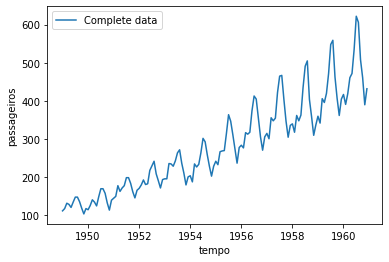

In [6]:
sns.lineplot(
    data=df_passengers,
    x='tempo',
    y='passageiros',
    label='Complete data'
)


## Scaler data

In [7]:
sc = StandardScaler()


In [8]:
sc.fit(df_passengers)

StandardScaler()

In [9]:
scaler_data=sc.transform(df_passengers)

In [10]:
x = scaler_data[:, 0]
y = scaler_data[:, 1]


<AxesSubplot:>

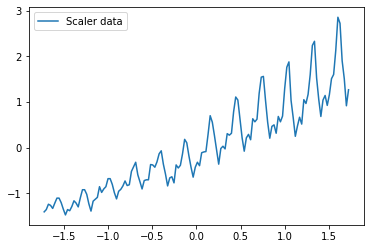

In [11]:
sns.lineplot(
    x=x,
    y=y,
    label='Scaler data'
)


## Split data to train

In [12]:
data_size = len(df_passengers)
size_train = int(data_size*0.9)
size_test = data_size-size_train


In [13]:
x_train, y_train, x_test, y_test = (
    x[0:size_train], y[0:size_train], 
    x[size_train:data_size], y[size_train:data_size]
    )


<AxesSubplot:>

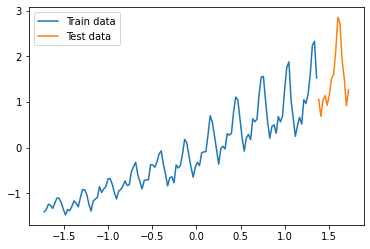

In [14]:
sns.lineplot(
    x=x_train,
    y=y_train,
    label='Train data'
)
sns.lineplot(
    x=x_test,
    y=y_test,
    label='Test data'
)


## Linear regression

In [15]:
model_regression = Sequential()
model_regression.add(
    Dense(
        1,
        input_dim=1,
        kernel_initializer='Ones',
        activation='linear',
        use_bias=False
    )
)
model_regression.compile(loss='mean_squared_error', optimizer='adam')


In [16]:
model_regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_regression.fit(x_train,y_train)

5/5 [==============================] - 1s 5ms/step - loss: 0.1284


In [18]:
y_predict=model_regression.predict(x_train)

5/5 [==============================] - 0s 1ms/step


[Text(0.5, 1.0, 'Predict with linear regression')]

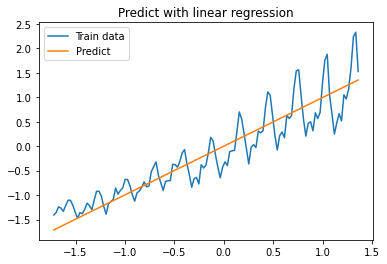

In [19]:
sns.lineplot(
    x=x_train,
    y=y_train,
    label='Train data'
)
sns.lineplot(
    x=x_train,
    y=y_predict[:,0],
    label='Predict'
).set(title="Predict with linear regression")



### Back to initial values

In [20]:
df_result_linear_regression =pd.DataFrame({
    'time':x_train,
    'passengers': y_predict[:,0]
})

df_result_linear_regression.sample(5)

,time,passengers
87,0.372881,0.371303
26,-1.094586,-1.089953
112,0.974302,0.970178
103,0.757791,0.754583
88,0.396938,0.395258


In [21]:
df_result_linear_regression_transf = pd.DataFrame(
    sc.inverse_transform(df_result_linear_regression),
    columns=["time", "passengers"]
)
df_result_linear_regression_transf.sample(5)

,time,passengers
76,1955.333333,293.185702
115,1958.583333,404.873821
65,1954.416667,261.683924
82,1955.833333,310.368488
100,1957.333333,361.916848


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

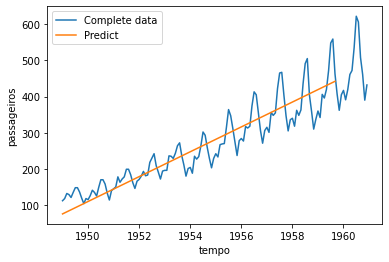

In [22]:
sns.lineplot(
    data=df_passengers,
    x='tempo',
    y='passageiros',
    label='Complete data'
)
sns.lineplot(
    data=df_result_linear_regression_transf,
    x='time',
    y='passengers',
    label='Predict'
)


In [23]:
y_predict_test= model_regression.predict(x_test)


1/1 [==============================] - 0s 18ms/step


In [24]:
df_result_linear_regression_test = pd.DataFrame({
    'time': x_test,
    'passengers': y_predict_test[:, 0]
})

df_result_linear_regression_test.sample(5)


,time,passengers
12,1.671950,1.664873
10,1.623837,1.616963
2,1.431382,1.425323
8,1.575723,1.569053
3,1.455439,1.449278


In [25]:
df_result_linear_regression_test_transf = pd.DataFrame(
    sc.inverse_transform(df_result_linear_regression_test),
    columns=["time", "passengers"]
)
df_result_linear_regression_test_transf.sample(5)


,time,passengers
4,1960.083333,456.422188
14,1960.916667,485.060175
9,1960.500000,470.741181
12,1960.750000,479.332569
13,1960.833333,482.196379


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

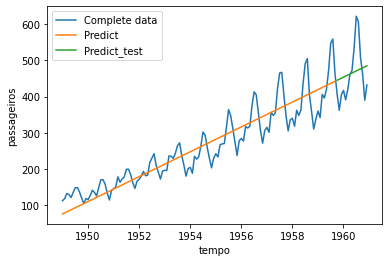

In [26]:
sns.lineplot(
    data=df_passengers,
    x='tempo',
    y='passageiros',
    label='Complete data'
)
sns.lineplot(
    data=df_result_linear_regression_transf,
    x='time',
    y='passengers',
    label='Predict'
)
sns.lineplot(
    data=df_result_linear_regression_test_transf,
    x='time',
    y='passengers',
    label='Predict_test'
)


## Linear regression multi fields

In [27]:
model_regression_multi_fields = Sequential(
   [ 
    Dense(
        8,
        input_dim=1,
        kernel_initializer='random_uniform',
        activation='sigmoid',
        use_bias=False
    ), 
    Dense(
        8,
        kernel_initializer='random_uniform',
        activation='sigmoid',
        use_bias=False
    ),
    Dense(
        1,
        kernel_initializer='random_uniform',
        activation='linear',
        use_bias=False
    )
    ]
)
model_regression_multi_fields.compile(loss='mean_squared_error', optimizer='adam')


In [28]:
model_regression_multi_fields.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_regression_multi_fields.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.7913
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7877
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7858
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7839
Epoch 5/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7834
Epoch 6/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7814
Epoch 7/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7812
Epoch 8/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7811
Epoch 9/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7817
Epoch 10/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7813
Epoch 11/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7809
Epoch 12/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7808
Epoch 13/1000
5/5 [==============================

In [30]:
y_predict = model_regression_multi_fields.predict(x_train)
y_predict_test = model_regression_multi_fields.predict(x_test)


1/1 [==============================] - 0s 18ms/step


<AxesSubplot:>

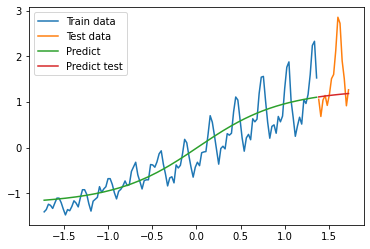

In [31]:
sns.lineplot(
    x=x_train,
    y=y_train,
    label='Train data'
)
sns.lineplot(
    x=x_test,
    y=y_test,
    label='Test data'
)
sns.lineplot(
    x=x_train,
    y=y_predict[:,0],
    label='Predict'
)
sns.lineplot(
    x=x_test,
    y=y_predict_test[:, 0],
    label='Predict test'
)


## Edit data to train

In [32]:
def processing_delay_data(vector,n_steps):
    x_new, y_new = [],[]
    for i in range(n_steps,vector.shape[0]):
        x_new.append(list(vector.loc[i-n_steps:i-1]))
        y_new.append(vector.loc[i])
    x_new, y_new = np.array(x_new), np.array(y_new)
    return x_new, y_new


In [33]:
vector_train = pd.DataFrame(y_train)[0]
vector_test =  pd.DataFrame(y_test)[0]

In [34]:
x_train_new, y_train_new = processing_delay_data(vector_train, 1)
x_test_new, y_test_new = processing_delay_data(vector_test, 1)


In [35]:
model_regression_delay_passengers = Sequential(
    [
        Dense(
            8,
            input_dim=1,
            kernel_initializer='ones',
            activation='linear',
            use_bias=False
        ),
        Dense(
            64,
            kernel_initializer='random_uniform',
            activation='sigmoid',
            use_bias=False
        ),
        Dense(
            1,
            kernel_initializer='random_uniform',
            activation='linear',
            use_bias=False
        )
    ]
)
model_regression_delay_passengers.compile(
    loss='mean_squared_error', optimizer='adam')


In [36]:
model_regression_delay_passengers.fit(x_train_new,y_train_new,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8474
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7794
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7492
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7212
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7045
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6866
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6663
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6429
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6182
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5892
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5620
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5286
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [37]:
y_predict_train_new = model_regression_delay_passengers.predict(x_train_new)
y_predict_test_new = model_regression_delay_passengers.predict(x_test_new)


1/1 [==============================] - 0s 37ms/step


<AxesSubplot:xlabel='tempo', ylabel='0'>

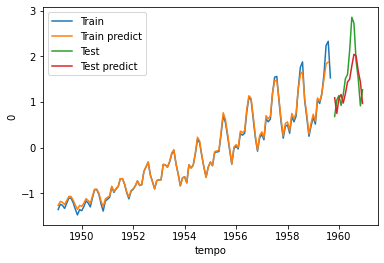

In [38]:
sns.lineplot(
    data=df_passengers[1:129],
    x='tempo',
    y=y_train_new,
    label='Train'
)

sns.lineplot(
    data=df_passengers[1:129],
    x='tempo',
    y=pd.DataFrame(y_predict_train_new)[0],
    label='Train predict'
)

sns.lineplot(
    data=df_passengers[130:144],
    x='tempo',
    y=y_test_new,
    label='Test'
)

sns.lineplot(
    data=df_passengers[130:144],
    x='tempo',
    y=pd.DataFrame(y_predict_test_new)[0].values,
    label='Test predict'
)


### More history months

In [39]:
x_train_new_4, y_train_new_4 = processing_delay_data(vector_train, 4)
x_test_new_4, y_test_new_4 = processing_delay_data(vector_test, 4)


In [40]:
model_regression_delay_passengers_4 = Sequential(
    [
        Dense(
            8,
            input_dim=4,
            kernel_initializer='ones',
            activation='linear',
            use_bias=False
        ),
        Dense(
            64,
            kernel_initializer='random_uniform',
            activation='sigmoid',
            use_bias=False
        ),
        Dense(
            1,
            kernel_initializer='random_uniform',
            activation='linear',
            use_bias=False
        )
    ]
)
model_regression_delay_passengers_4.compile(
    loss='mean_squared_error', optimizer='adam')


In [41]:
model_regression_delay_passengers_4.fit(
    x_train_new_4, y_train_new_4, epochs=1000,  validation_split=0.2)


Epoch 1/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.6772 - val_loss: 1.2788
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5379 - val_loss: 1.4236
Epoch 3/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4363 - val_loss: 1.5482
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.3767 - val_loss: 1.6402
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3448 - val_loss: 1.6740
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.3217 - val_loss: 1.6111
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.3031 - val_loss: 1.5079
Epoch 8/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2834 - val_loss: 1.3644
Epoch 9/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2599 - val_loss: 1.2097
Epoch 10/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2360 - val_loss: 1.0775
Epoch 11/100

In [42]:
y_predict_train_new_4 = model_regression_delay_passengers_4.predict(x_train_new_4)
y_predict_test_new_4 = model_regression_delay_passengers_4.predict(x_test_new_4)


1/1 [==============================] - 0s 16ms/step


<AxesSubplot:xlabel='tempo'>

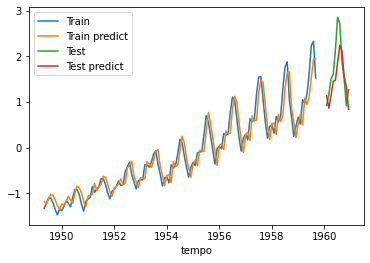

In [43]:
sns.lineplot(
    data=df_passengers[4:129],
    x='tempo',
    y=y_train_new_4,
    label='Train'
)

sns.lineplot(
    data=df_passengers[4:129],
    x='tempo',
    y=pd.DataFrame(y_predict_train_new_4)[0].values,
    label='Train predict'
)

sns.lineplot(
    data=df_passengers[133:144],
    x='tempo',
    y=y_test_new_4,
    label='Test'
)

sns.lineplot(
    data=df_passengers[133:144],
    x='tempo',
    y=pd.DataFrame(y_predict_test_new_4)[0].values,
    label='Test predict'
)
